In [2]:
!pip install ta
!pip install backtesting
!pip install backtrader
!pip install pmdarima


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import ta
from sklearn.model_selection import train_test_split
from backtesting import Backtest, Strategy
import backtrader as bt
from backtesting.lib import crossover
from ta.volume import MFIIndicator  
from ta.momentum import StochasticOscillator

c:\udithsandaruwan.me\py-scripts\price_prediction\venv\Lib\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [4]:
import yfinance as yf

# Download historical SOL-USD data
df = yf.download("SOL-USD", start="2021-01-01", end="2024-12-31", interval='1d')

# Clean and prepare
df.dropna(inplace=True)
df.reset_index(inplace=True)

# Save to CSV
df.to_csv("sol_usd_historical_data.csv", index=False)

print("CSV file saved as 'sol_usd_historical_data.csv'")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

CSV file saved as 'sol_usd_historical_data.csv'


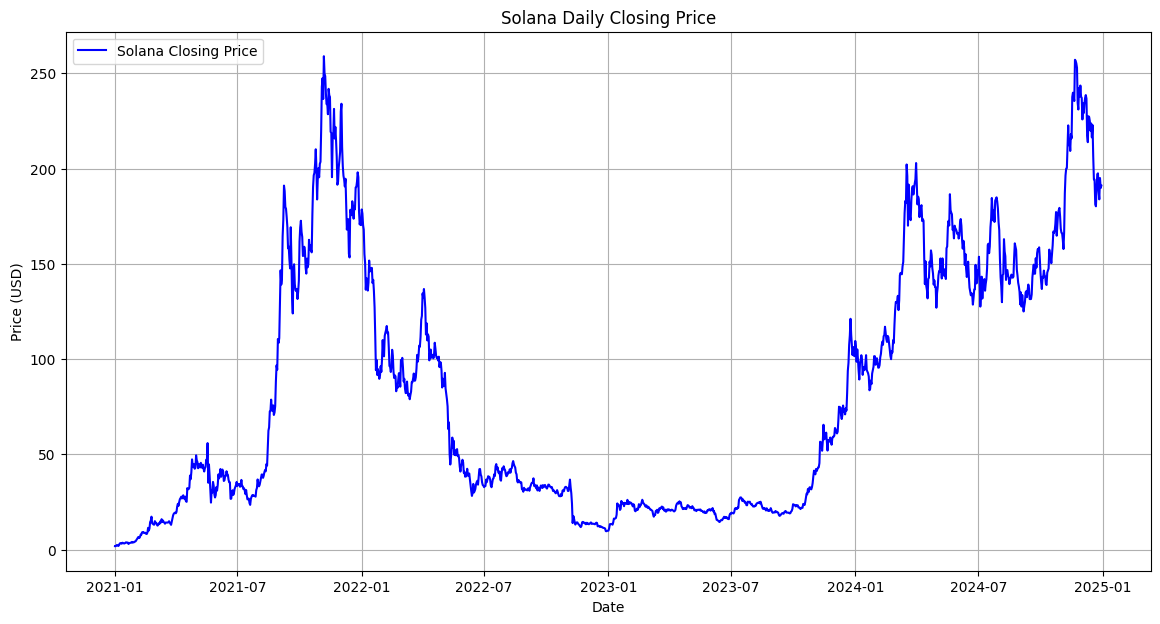

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV and skip the second row (second header)
data = pd.read_csv('sol_usd_historical_data.csv', skiprows=[1])

# Parse 'Date' column and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Convert numeric columns to float (if needed)
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaNs (just in case)
data.dropna(inplace=True)

# Plot Closing Price
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Solana Closing Price', color='blue')
plt.title('Solana Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


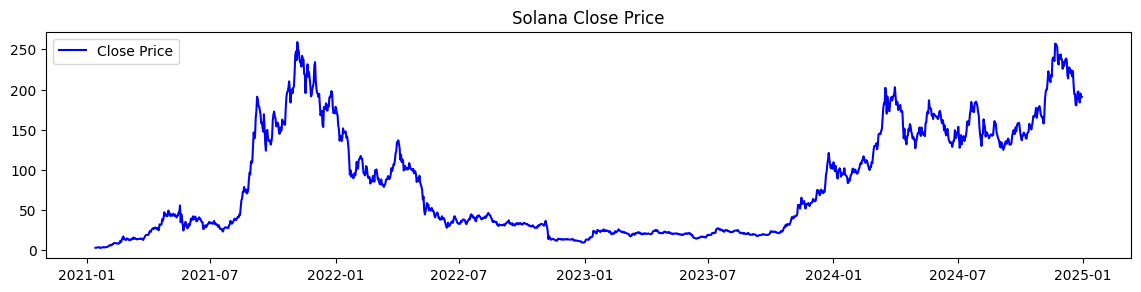

In [15]:
# Feature Engineering: MFI and Stochastic Oscillator
data['MFI'] = MFIIndicator(high=data['High'], low=data['Low'], close=data['Close'], volume=data['Volume'], window=14).money_flow_index()
data['Stochastic'] = StochasticOscillator(close=data['Close'], high=data['High'], low=data['Low'], window=14).stoch()

# Handle any NaN values resulting from the indicators
data.dropna(inplace=True)

# Visualize the technical indicators
plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Solana Close Price')
plt.legend()

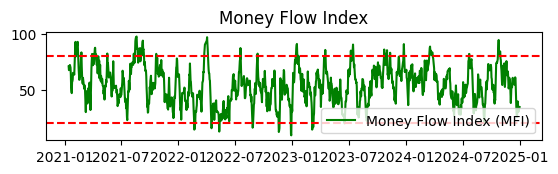

In [16]:
plt.subplot(3,1,2)
plt.plot(data['MFI'], label='Money Flow Index (MFI)', color='green')
plt.axhline(80, color='red', linestyle='--')
plt.axhline(20, color='red', linestyle='--')
plt.title('Money Flow Index')
plt.legend()


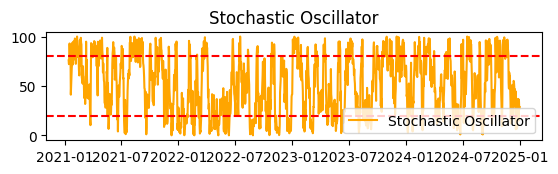

In [17]:
plt.subplot(3,1,3)
plt.plot(data['Stochastic'], label='Stochastic Oscillator', color='orange')
plt.axhline(80, color='red', linestyle='--')
plt.axhline(20, color='red', linestyle='--')
plt.title('Stochastic Oscillator')
plt.legend()

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
# Train-Test Split
train_data = data['Close'][:-60]  # Using the last 60 days as the test set
test_data = data['Close'][-60:]


In [22]:
%pip install --upgrade numpy pandas scipy statsmodels pmdarima

from pmdarima import auto_arima

# Automatically find the best ARIMA order
stepwise_model = auto_arima(train_data, start_p=1, start_q=1,
                            max_p=5, max_q=5, seasonal=False,
                            d=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

# Print the best ARIMA order
print(stepwise_model.order)

# Fit the model with the best order
model_fit = stepwise_model.fit(train_data)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject